**Importing the Data**

In [9]:
dataset_path = '/content/drive/MyDrive/Colab Notebooks/dataset'
plain_road_path = dataset_path + '/plain'
pothles_path = dataset_path + '/pothole'

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [11]:
plain_img = os.listdir(plain_road_path)
pothole_img = os.listdir(pothles_path)

In [12]:
type(pothole_img)

list

Showing the Raw Images of Potholes and Plain Road

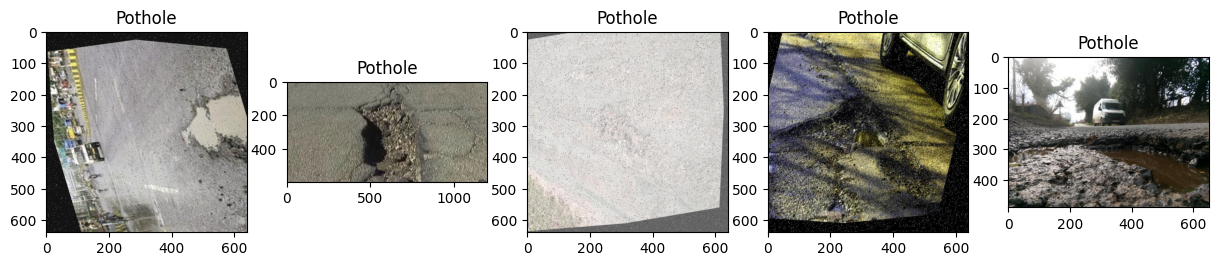

In [13]:
plt.figure(figsize=(15,10))
#shwoing images through subplots
for i in range(5):
  plt.subplot(1,5,i+1)
  filename = pothole_img[i]
  image_path = os.path.join(pothles_path, filename)
  img = plt.imread(image_path)
  plt.imshow(img)
  plt.title('Pothole')
plt.show()

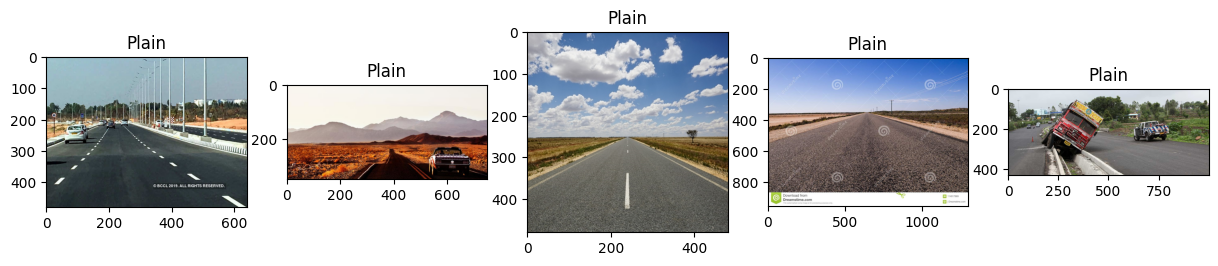

In [14]:
# Show the Plain Road Images
plt.figure(figsize=(15,10))
#shwoing images through subplots
for i in range(5):
  plt.subplot(1,5,i+1)
  filename = plain_img[i]
  image_path = os.path.join(plain_road_path, filename)
  img = plt.imread(image_path)
  plt.imshow(img)
  plt.title('Plain')
plt.show()

In [15]:
print('Number of Plain Images: ', len(plain_img))
print('Number of Potholes Images: ', len(pothole_img))

Number of Plain Images:  727
Number of Potholes Images:  3395


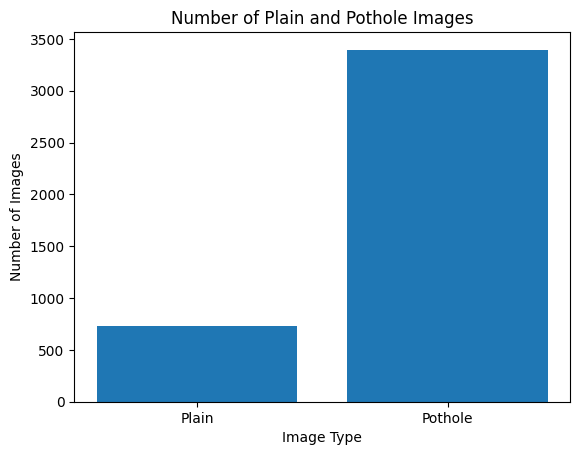

In [16]:
# bar plot of plain and pothole images
labels = ['Plain', 'Pothole']
values = [len(plain_img), len(pothole_img)]
plt.bar(labels, values)
plt.title('Number of Plain and Pothole Images')
plt.xlabel('Image Type')
plt.ylabel('Number of Images')
plt.show()

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

Normalization of Images

In [18]:
plain_images = []
pothole_images = []

In [19]:
for i in plain_img:
  plain_img_path = os.path.join(plain_road_path,i)
  img = load_img(plain_img_path,target_size=(128,128))
  img_arr = img_to_array(img)
  img_norm = img_arr/255.0
  plain_images.append(img_norm)
plain_images = np.array(plain_images)
print(f'Loaded {len(plain_images)} images.')

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Loaded 727 images.


In [20]:
for j in pothole_img:
  pothole_img_path = os.path.join(pothles_path,j)
  img = load_img(pothole_img_path,target_size=(128,128))
  img_arr = img_to_array(img)
  img_norm = img_arr/255.0
  pothole_images.append(img_norm)
pothole_images = np.array(pothole_images)
print(f'Loaded {len(pothole_images)} images.')

Loaded 3395 images.


In [21]:
print('Shape of Plain Images: ', plain_images.shape)
print('Shape of Pothole Images:', pothole_images.shape)

Shape of Plain Images:  (727, 128, 128, 3)
Shape of Pothole Images: (3395, 128, 128, 3)


**Data Augmentation** of Plain Road Images

In [22]:
datagenerator =  ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
augmented_plain_images = []
augmented_labels = []
#augmentation of images data

for k in plain_images:
  for i in range(2):
    augmented_plain_images.append(datagenerator.random_transform(plain_images[i]))
    augmented_labels.append(plain_img[i])
augmented_plain_images = np.array(augmented_plain_images)
print(f'Loaded {len(augmented_plain_images)} images.')

Loaded 1454 images.


In [23]:
plain_images_all = np.append(plain_images,augmented_plain_images, axis=0)

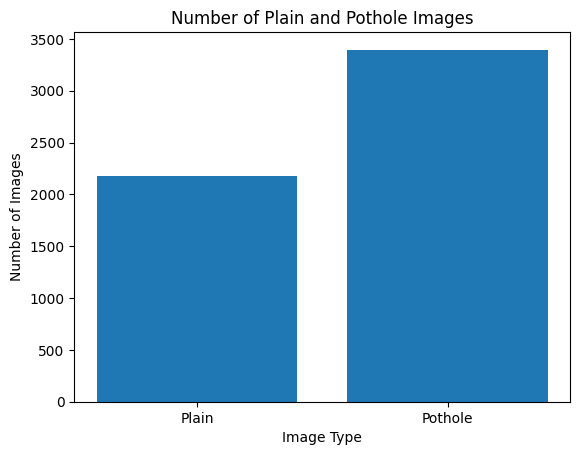

In [24]:
# bar plot of plain and pothole images
labels = ['Plain', 'Pothole']
values = [len(plain_images_all), len(pothole_images)]
plt.bar(labels, values)
plt.title('Number of Plain and Pothole Images')
plt.xlabel('Image Type')
plt.ylabel('Number of Images')
plt.show()

In [25]:
labels = []
data = []
for i in range(len(plain_images_all)):
  labels.append('Plain')
for j in range(len(pothole_images)):
  labels.append('Pothole')

for k in range(len(plain_images_all)):
  data.append(plain_images_all[k])
for l in range(len(pothole_images)):
  data.append(pothole_images[l])

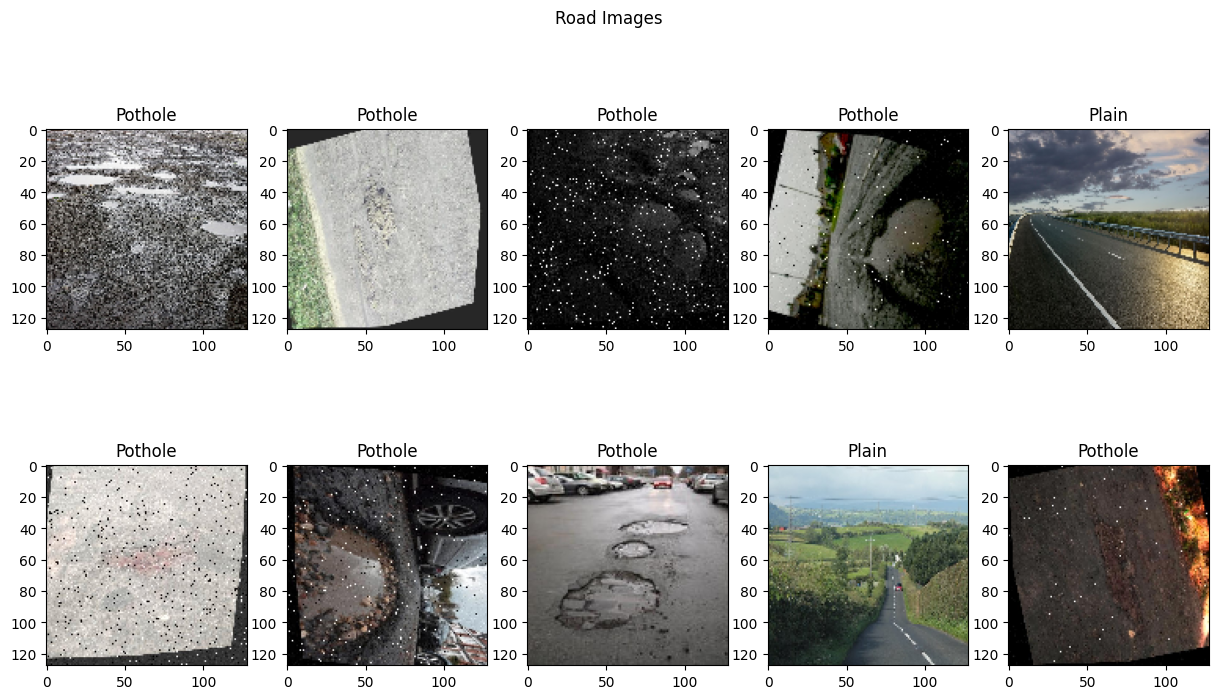

In [26]:
import random
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,8))
fig.suptitle('Road Images')
for i in range(10):
    l = random.randint(0, len(labels))
    ax = axes[i//5, i%5]
    ax.imshow(data[l])
    ax.set_title(labels[l])
    # ax.set_aspect('equal')
plt.show()

In [27]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
le = LabelEncoder()
Y = []
new = le.fit_transform(labels)
Y = to_categorical(new, num_classes=2)

X = np.array(data, dtype='float32')
X = X/255.0

In [28]:
print('Shape of data: ',X.shape)
print('Shape of labels: ', Y.shape)

Shape of data:  (5576, 128, 128, 3)
Shape of labels:  (5576, 2)


Split the Images into Test Train

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Convolutional Neural Network

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam


In [31]:
model= Sequential([
  Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
  MaxPooling2D((2,2)),
  Dropout(0.2),

  Conv2D(64, (3,3), activation='relu'),
  MaxPooling2D((2,2)),
  Dropout(0.2),

  Conv2D(128, (3,3), activation='relu'),
  MaxPooling2D((2,2)),
  Dropout(0.2),

  Flatten(),
  Dense(128, activation='relu'),
  Dense(2, activation='sigmoid'),
  # Dense(2, activation='softmax'))
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
training = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.6231 - loss: 0.6550 - val_accuracy: 0.8665 - val_loss: 0.3932
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - accuracy: 0.8927 - loss: 0.3315 - val_accuracy: 0.8907 - val_loss: 0.3224
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.8960 - loss: 0.3185 - val_accuracy: 0.8978 - val_loss: 0.2955
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.9141 - loss: 0.2568 - val_accuracy: 0.8987 - val_loss: 0.2649
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 250s 1s/step - accuracy: 0.9182 - loss: 0.2477 - val_accuracy: 0.9050 - val_loss: 0.2461
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - accuracy: 0.9186 - loss: 0.2256 - val_accuracy: 0.9185 - val_loss: 0.2174
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 193s 1s/step - accuracy: 0.9147 - loss: 0.2102 - val_accuracy: 0.9194 - val_loss: 0.2267
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 190s 1s/step - accuracy: 0.9260 - loss: 0.1918 - val_accu

Model Evaluation

In [35]:
loss,accuracy= model.evaluate(x_test, y_test)
print('Test accuracy: {:2.2f}%'.format(accuracy*100))
print('Test loss {:2.2f}%'.format(loss*100))

35/35 ━━━━━━━━━━━━━━━━━━━━ 13s 353ms/step - accuracy: 0.9113 - loss: 0.2437
Test accuracy: 91.22%
Test loss 23.31%


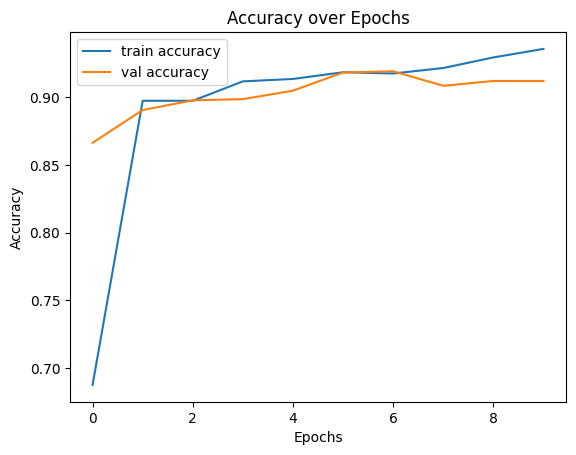

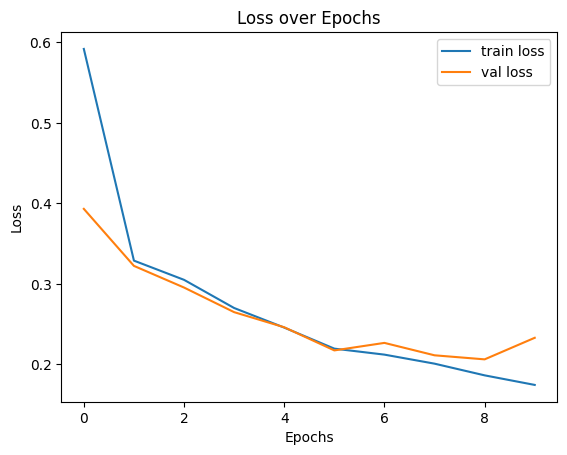

In [36]:
# Plot training and validation accuracy
plt.plot(training.history['accuracy'], label='train accuracy')
plt.plot(training.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(training.history['loss'], label='train loss')
plt.plot(training.history['val_loss'], label='val loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


35/35 ━━━━━━━━━━━━━━━━━━━━ 13s 371ms/step


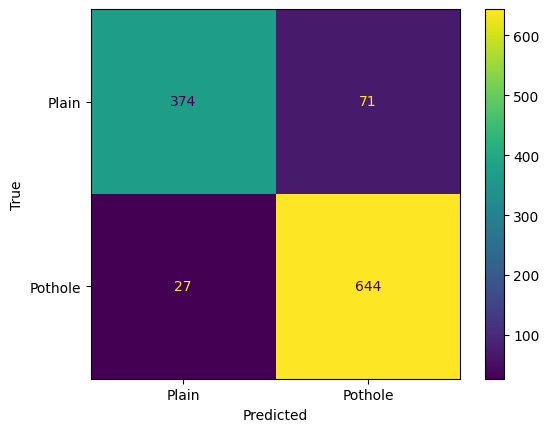

In [37]:
#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot()

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()